Step 1: Import required libraries

In [2]:
import pandas as pd

Step 2: Load the dataset

In [3]:
df = pd.read_csv("owid-co2-data.csv")

Step 3: View the shape of the data

In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (50191, 79)


Step 4: View the column names

In [5]:
print("Columns:\n", df.columns.tolist())

Columns:
 ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per

Step 5: Preview the first 5 rows

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 6: Data types and non-null counts

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

Step 7: Check for missing values (in percentage)

In [8]:
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("Missing value percentages (only for columns with missing data):\n", missing_percent)

Missing value percentages (only for columns with missing data):
 share_global_cumulative_other_co2       95.800044
share_global_other_co2                  95.800044
other_co2_per_capita                    95.070829
cumulative_other_co2                    93.620370
other_industry_co2                      93.620370
                                          ...    
share_of_temperature_change_from_ghg    18.310056
temperature_change_from_ghg             18.310056
temperature_change_from_co2             18.310056
population                              18.274193
iso_code                                15.797653
Length: 77, dtype: float64


Since I am interested only in the recent years and also since we don't have the data for previous years for many (or most) countires, I am filtering the records only years from 2000 onwards

In [9]:
df_recent = df[df['year'] >= 2000]

In [10]:
df_recent.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
250,Afghanistan,2000,AFG,20130334.0,1.128379e+10,0.010,0.001,1.047,-0.045,-4.078,...,NaN,0.081,0.0,0.0,0.001,0.0,16.955,4.521,NaN,NaN
251,Afghanistan,2001,AFG,20284303.0,1.102127e+10,0.007,0.000,1.069,0.022,2.098,...,NaN,0.079,0.0,0.0,0.001,0.0,15.772,4.670,NaN,NaN
252,Afghanistan,2002,AFG,21378123.0,1.880487e+10,0.011,0.001,1.341,0.272,25.432,...,NaN,0.079,0.0,0.0,0.001,0.0,20.735,5.132,NaN,NaN
253,Afghanistan,2003,AFG,22733054.0,2.107434e+10,0.010,0.000,1.560,0.219,16.302,...,NaN,0.078,0.0,0.0,0.001,0.0,21.423,5.521,NaN,NaN
254,Afghanistan,2004,AFG,23560656.0,2.233257e+10,0.010,0.000,1.237,-0.322,-20.669,...,NaN,0.078,0.0,0.0,0.001,0.0,20.057,5.354,NaN,NaN


We have 79 columns, but we're not interested in all of them. Let's select only a few relevant columns

In [11]:
columns_to_keep = ['country', 'year', 'co2', 'co2_per_capita', 'gdp', 'energy_per_capita']
df_recent = df_recent[columns_to_keep]

Since CO2 is the main variable we're going to be using, we'll be dropping the records that has a null value in CO2

In [12]:
df_recent = df_recent.dropna(subset=['co2'])

Let's see the shape after these filtering

In [13]:
print("New shape after filtering:", df_recent.shape)
df_recent.head()

New shape after filtering: (5928, 6)


,country,year,co2,co2_per_capita,gdp,energy_per_capita
250,Afghanistan,2000,1.047,0.052,1.128379e+10,302.595
251,Afghanistan,2001,1.069,0.053,1.102127e+10,236.892
252,Afghanistan,2002,1.341,0.063,1.880487e+10,210.862
253,Afghanistan,2003,1.560,0.069,2.107434e+10,229.968
254,Afghanistan,2004,1.237,0.053,2.233257e+10,204.231


Let's see a few stats with our data

In [19]:
df_recent['year'].max()

2023

How many unique countries in the dataset?

In [18]:
print("Number of countries:", df_recent['country'].nunique())

Number of countries: 247


Total global emissions in the latest year

In [21]:
print("Total global emissions in", df_recent['year'].max(), ":", df_latest['co2'].sum(), "million tonnes")

Total global emissions in 2023 : 241116.668 million tonnes


Let's take the data for the most recent year (2023) and sort countries based on CO2 emissions

In [15]:
latest_year = df_recent['year'].max()
df_latest = df_recent[df_recent['year'] == latest_year]

Now we sort countries by the CO2 emissions in desc order and get top 10

In [16]:
top_emitters = df_latest.sort_values(by='co2', ascending=False).head(10)
top_emitters[['country', 'co2']]

,country,co2
49568,World,37791.570
33427,Non-OECD (GCP),25442.199
2939,Asia,22600.221
3113,Asia (GCP),19747.367
48073,Upper-middle-income countries,17581.070
20570,High-income countries,14014.305
9885,China,11902.503
34945,OECD (GCP),11232.802
3387,Asia (excl. China and India),7635.394
33701,North America,6123.550


We plot this as a bar chart to see it visuallly

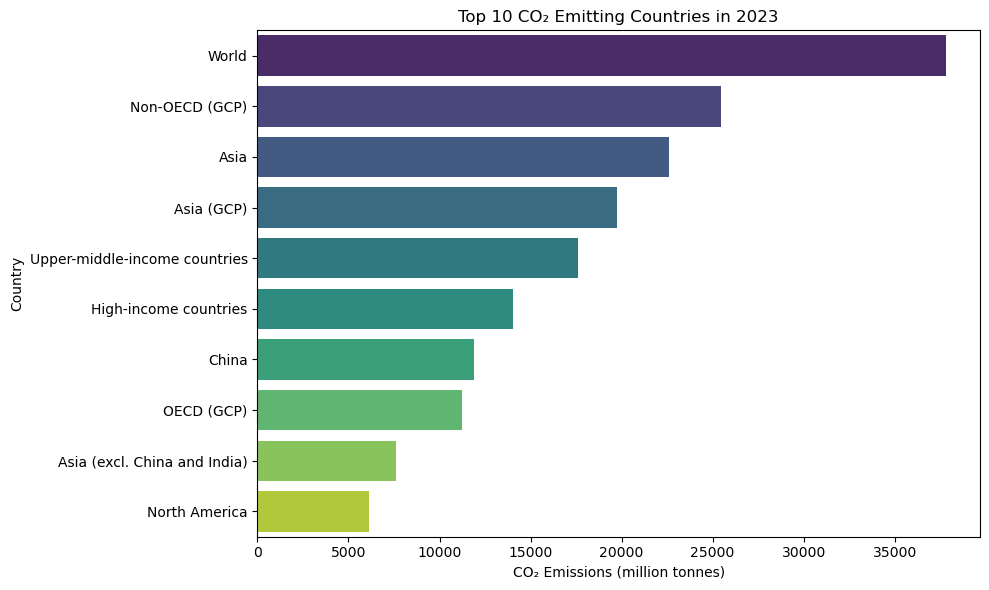

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_emitters, x='co2', y='country', palette='viridis')
plt.title(f"Top 10 CO₂ Emitting Countries in {latest_year}")
plt.xlabel("CO₂ Emissions (million tonnes)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Average CO₂ per capita in latest year

In [23]:
print("Average CO₂ per capita:", df_latest['co2_per_capita'].mean())

Average CO₂ per capita: 4.609809523809525


Let's pick the top 5 emitting countries from latest year by slicing them out

In [26]:
top5_countries = top_emitters['country'].tolist()[:5]
print("Top 5 countries to analyze:", top5_countries)
df_top5 = df_recent[df_recent['country'].isin(top5_countries)]

Top 5 countries to analyze: ['World', 'Non-OECD (GCP)', 'Asia', 'Asia (GCP)', 'Upper-middle-income countries']


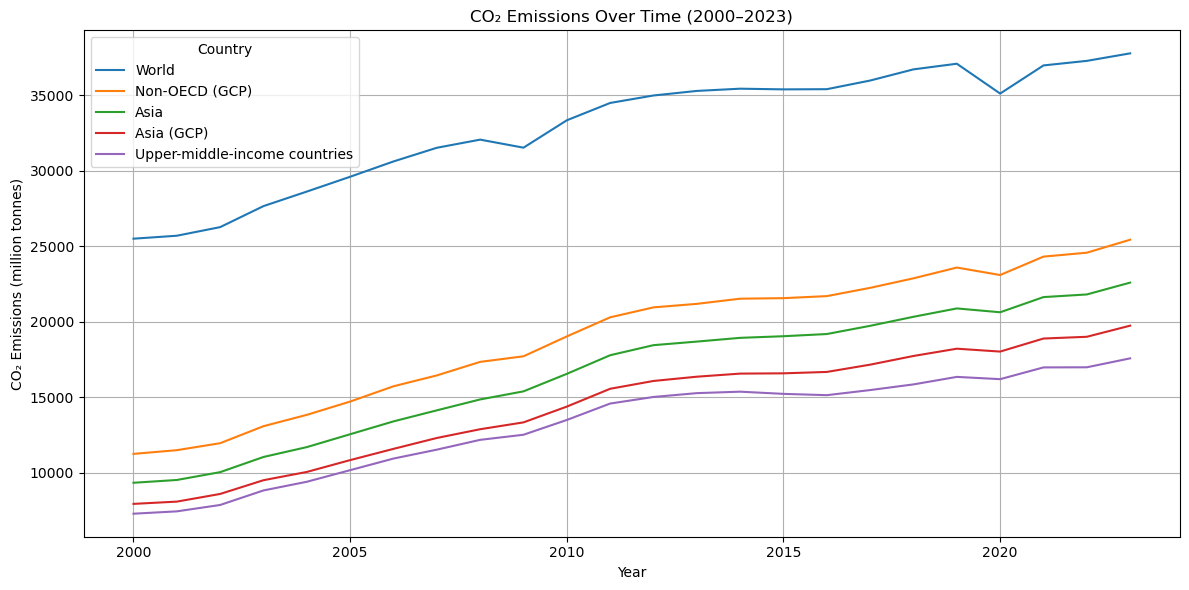

In [29]:
plt.figure(figsize=(12, 6))

for country in top5_countries:
    country_data = df_top5[df_top5['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=country)

plt.title("CO₂ Emissions Over Time (2000–2023)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (million tonnes)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

Similarly, if we see per capita emissions

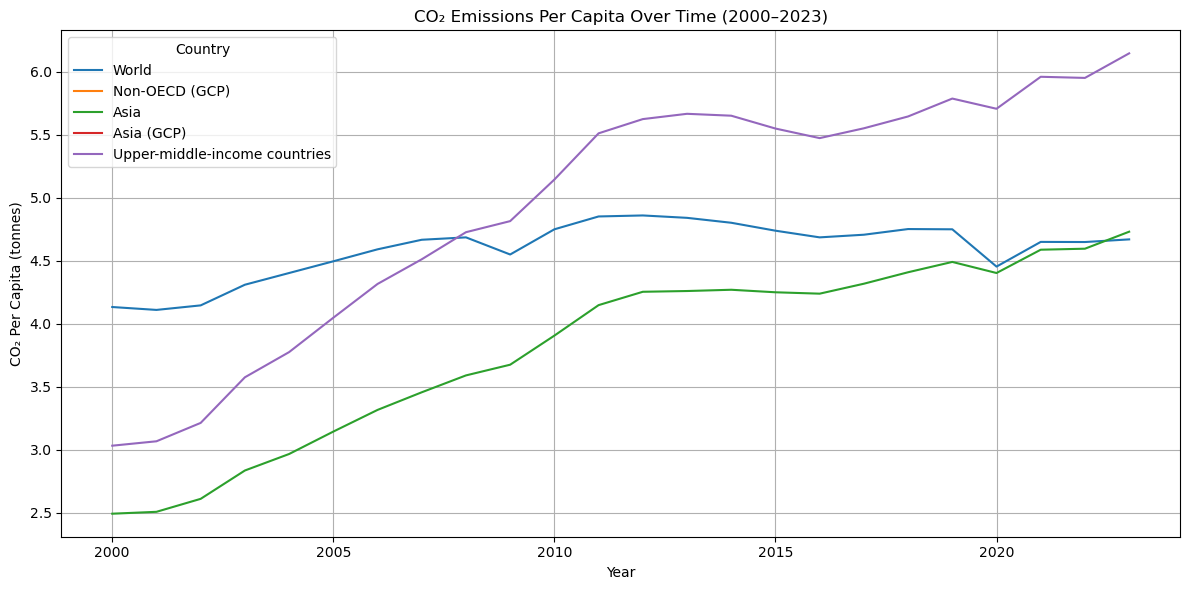

In [30]:
plt.figure(figsize=(12, 6))

for country in top5_countries:
    country_data = df_top5[df_top5['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country)

plt.title("CO₂ Emissions Per Capita Over Time (2000–2023)")
plt.xlabel("Year")
plt.ylabel("CO₂ Per Capita (tonnes)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

We don't have the CO2 per capita data for the 2 "countries" so we see only the lines for 3 countries

Now, let's see a Scatter Plot that shows the energy use vs CO2 emissions per person. This will show us if there is any relationship between these two variables. Let's drop the rows that contain null in either of these 2 columns since we need both values for the records (to remind, this is for the latest year, 2023)

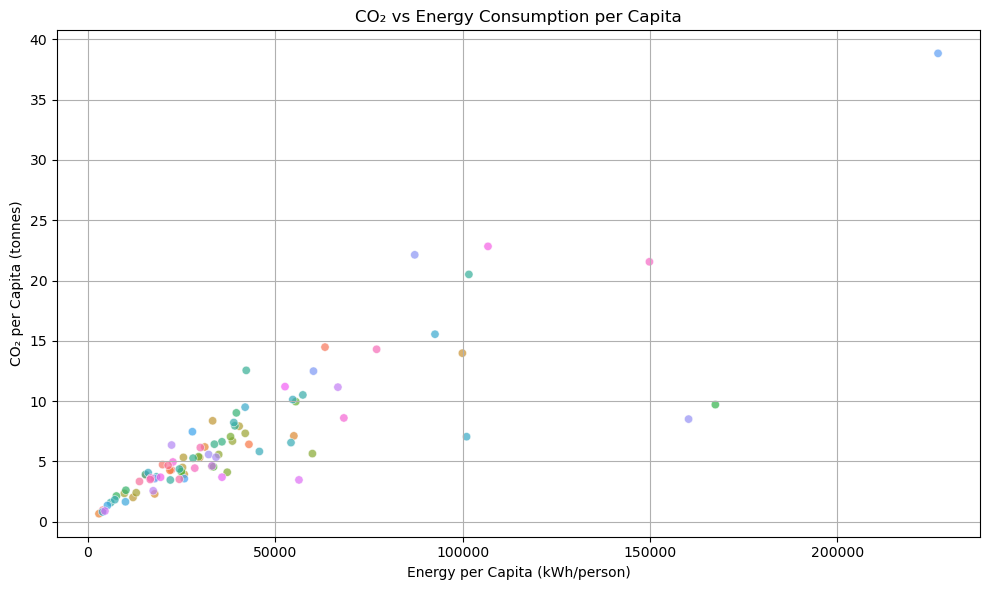

In [31]:
scatter_data = df_latest.dropna(subset=['co2_per_capita', 'energy_per_capita'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter_data, x='energy_per_capita', y='co2_per_capita', hue='country', alpha=0.7, legend=False)
plt.title("CO₂ vs Energy Consumption per Capita")
plt.xlabel("Energy per Capita (kWh/person)")
plt.ylabel("CO₂ per Capita (tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()

Now, we calculate the Pearson coefficient between these 2 variables

In [32]:
correlation = scatter_data['co2_per_capita'].corr(scatter_data['energy_per_capita'])
print(f"Correlation between energy use and CO₂ per capita: {correlation:.2f}")

Correlation between energy use and CO₂ per capita: 0.84


Since the value is closer to 1, we can say there is a strong positive relationship between these 2 variables, that is, more energy use means more CO2 emission per person

Now, I'll be exporting the cleaned data to use in Tableau Public. I'll be keeping only the required columns, drop records without CO2 values and export as csv

In [42]:
columns = ['country', 'year', 'co2', 'co2_per_capita', 'gdp', 'energy_per_capita']
df_export = df_recent[columns].copy()

In [43]:
df_export.rename(columns={
    'co2': 'Total_CO2',
    'co2_per_capita': 'CO2_per_Capita',
    'gdp': 'GDP',
    'energy_per_capita': 'Energy_per_Capita'
}, inplace=True)

In [44]:
df_export = df_export.dropna(subset=['Total_CO2', 'CO2_per_Capita'])

In [45]:
df_export.to_csv("cleaned_co2_data_for_tableau.csv", index=False)